<a href="https://colab.research.google.com/github/poo5zan/deep_learning_fundamentals/blob/main/assignment3/RNN_to_predict_stock_price_Assignment_3_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source code: https://www.relataly.com/stock-market-prediction-using-multivariate-time-series-in-python/1815/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import math
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
import yfinance as yf
from sklearn.metrics import mean_squared_error
import math

In [ ]:
def set_seed(seed_val=0):
    np.random.seed(seed_val)
    tf.random.set_seed(seed_val)
    tf.keras.utils.set_random_seed(seed_val)

set_seed()

In [ ]:
def get_data(symbol, start_date, end_date):
    stock_data_df = yf.download(symbol, start=start_date, end=end_date)
    return stock_data_df

In [ ]:
def plot_curve(x_values, y_values, x_label, y_label, title):
    plt.plot(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [ ]:
def plot_input_data(stock_data_df):
    # Plot line charts
    df_plot = stock_data_df.copy()

    ncols = 2
    nrows = int(round(df_plot.shape[1] / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(14, 7))
    for i, ax in enumerate(fig.axes):
            sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
            ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    plt.show()

In [ ]:
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '1991-01-01'
symbol = "AAPL"
stock_data = get_data(symbol, start_date, end_date)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-01-02,0.381696,0.392857,0.375000,0.388393,0.313172,154985600
1991-01-03,0.388393,0.395089,0.383929,0.383929,0.309572,150180800
1991-01-04,0.383929,0.395089,0.383929,0.386161,0.311372,141523200
1991-01-07,0.383929,0.404018,0.383929,0.386161,0.311372,310800000
1991-01-08,0.390625,0.391741,0.379464,0.386161,0.311372,218691200


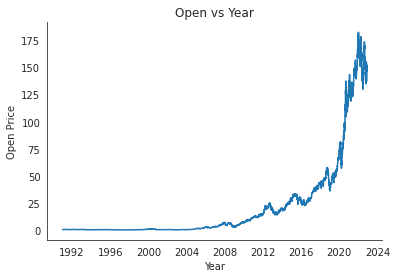

In [ ]:
dates = stock_data.index
open_stock = stock_data['Open'].values
plot_curve(dates, open_stock, 'Year', 'Open Price', 'Open vs Year')

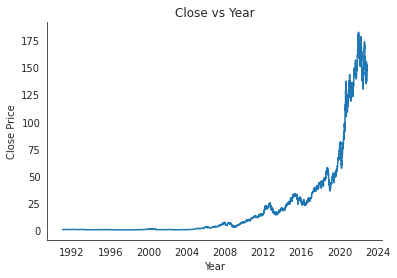

In [ ]:
dates = stock_data.index
close_stock = stock_data['Close'].values
plot_curve(dates, open_stock, 'Year', 'Close Price', 'Close vs Year')

In [ ]:
# Simple Moving Average
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '2010-01-01'
symbol = "AAPL"
data = get_data(symbol, start_date, end_date)
true_value = data.tail(1)['Close'].values[0]
def get_simple_moving_average(rolling_window):
    return data.rolling(rolling_window).mean().tail(1)['Close'].values[0]

simple_moving_average_results = []
for rolling_window in range(50):
    predicted = get_simple_moving_average(rolling_window)
    error = abs(predicted - true_value)
    simple_moving_average_results.append({
        'rolling_window': rolling_window,
        'true_value': true_value,
        'predicted_value': predicted,
        'error': error})
    
simple_moving_average_results_df = pd.DataFrame(simple_moving_average_results)
simple_moving_average_results_df.sort_values(by=['error'])

[*********************100%***********************]  1 of 1 completed


,rolling_window,true_value,predicted_value,error
1,1,151.289993,151.289993,0.000000
2,2,151.289993,151.004997,0.284996
3,3,151.289993,150.266663,1.023331
4,4,151.289993,150.209995,1.079998
5,5,151.289993,149.823996,1.465997
6,6,151.289993,149.803329,1.486664
7,7,151.289993,149.384282,1.905712
8,8,151.289993,147.569996,3.719997
21,21,151.289993,146.867142,4.422852
20,20,151.289993,146.846999,4.442995


In [ ]:
rolling_window = 8
predicted_sma = data.rolling(rolling_window).mean()[rolling_window:]
true_sma = data[rolling_window:]
mse = mean_squared_error(true_sma['Close'].values, predicted_sma['Close'].values)
print(mse)

1.4948353964873002


In [ ]:
data_ewm = data.ewm(com=0.1, adjust=False).mean()
mse_ewm = mean_squared_error(data['Close'].values, data_ewm['Close'].values)
print(mse_ewm)

0.006427838901387934


In [ ]:
# Exponential moving average
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '2010-01-01'
symbol = "AAPL"
data = get_data(symbol, start_date, end_date)
true_value = data.tail(1)['Close'].values[0]
ewm_results = []
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    predicted_value = data.ewm(alpha=alpha, adjust=False).mean().tail(1)['Close'].values[0]
    error = abs(true_value - predicted_value)
    
    ewm_results.append(
        {'alpha': alpha,
        'true_value': true_value,
        'predicted_value': predicted_value,
        'error': error})
  
ewm_results_df = pd.DataFrame(ewm_results)

ewm_results_df.sort_values(by=['error'])

[*********************100%***********************]  1 of 1 completed


,alpha,true_value,predicted_value,error
9,1.0,151.289993,151.289993,0.000000
8,0.9,151.289993,151.214778,0.075215
7,0.8,151.289993,151.106110,0.183884
6,0.7,151.289993,150.963846,0.326147
5,0.6,151.289993,150.774421,0.515572
4,0.5,151.289993,150.494116,0.795877
3,0.4,151.289993,150.029632,1.260362
2,0.3,151.289993,149.247816,2.042177
1,0.2,151.289993,148.082061,3.207932
0,0.1,151.289993,146.796652,4.493342


In [ ]:
# Exponential moving average, decay rate = 0.5
true_value = data.tail(1)['Close'].values[0]
predicted_value = data.ewm(com=0.8, adjust=False).mean().tail(1)['Close'].values[0]
error = abs(true_value - predicted_value)
print(error)

1.180135855785693


In [ ]:
def partition_dataset(sequence_length, data, index_Close):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

In [ ]:
def process_data(df, feature_columns, sequence_length, prediction_column, train_size = 0.8):
    # Indexing Batches
    train_df = df.sort_values(by=['Date']).copy()    

    # Create the dataset with features and filter the data to the list of feature_columns
    data = pd.DataFrame(train_df)
    data_filtered = data[feature_columns]

    # We add a prediction column and set dummy values to prepare the data for scaling
    data_filtered_ext = data_filtered.copy()
    data_filtered_ext['Prediction'] = data[prediction_column]

    # Get the number of rows in the data
    nrows = data_filtered.shape[0]

    # Convert the data to numpy values
    np_data_unscaled = np.array(data_filtered)
    np_data = np.reshape(np_data_unscaled, (nrows, -1))

    # Transform the data by scaling each feature to a range between 0 and 1
    scaler = MinMaxScaler()
    np_data_scaled = scaler.fit_transform(np_data_unscaled)

    # Creating a separate scaler that works on a single column for scaling predictions
    scaler_pred = MinMaxScaler()
    df_Close = pd.DataFrame(data[prediction_column])
    np_Close_scaled = scaler_pred.fit_transform(df_Close)

    # Set the sequence length - this is the timeframe used to make a single prediction
    # Prediction Index
    index_Close = data.columns.get_loc(prediction_column)

    # Split the training data into train and train data sets
    # As a first step, we get the number of rows to train the model on 80% of the data 
    train_data_len = math.ceil(np_data_scaled.shape[0] * train_size)

    # Create the training and test data
    train_data = np_data_scaled[0:train_data_len, :]
    test_data = np_data_scaled[train_data_len - sequence_length:, :]

    # Generate training data and test data
    x_train, y_train = partition_dataset(sequence_length, train_data, index_Close)
    x_test, y_test = partition_dataset(sequence_length, test_data, index_Close)

    return x_train, y_train, x_test, y_test, scaler, scaler_pred, data_filtered_ext, data, train_data_len
    


In [ ]:
# Configure the neural network model
def get_lstm_model(x_train, optimizer, loss):
    model = Sequential()

    # Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
    n_neurons = x_train.shape[1] * x_train.shape[2]
    model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
    model.add(LSTM(n_neurons, return_sequences=False))
    model.add(Dense(5))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss)

    return model

In [ ]:
# Configure the neural network model
def get_simple_rnn_model(x_train, optimizer, loss):
    model = Sequential()

    # Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
    n_neurons = x_train.shape[1] * x_train.shape[2]
    model.add(SimpleRNN(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
    model.add(SimpleRNN(n_neurons, return_sequences=False))
    model.add(Dense(5))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss)
    return model

In [ ]:
# Configure the neural network model
def get_gru_model(x_train, optimizer, loss):
    model = Sequential()

    # Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
    n_neurons = x_train.shape[1] * x_train.shape[2]
    # print(n_neurons, x_train.shape[1], x_train.shape[2])
    model.add(GRU(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
    model.add(GRU(n_neurons, return_sequences=False))
    model.add(Dense(5))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss)
    return model

In [ ]:
def plot_loss_curve(history, epochs):
    val_losses = history.history['val_loss']
    train_losses = history.history['loss']
    plt.plot(epochs, train_losses, 'r', label='Train')
    plt.plot(epochs, val_losses, 'k', label='Validation')
    plt.legend()
    plt.title('Loss curve')
    plt.show()


In [ ]:
# Training the model
def train_network(model, x_train, y_train, x_test, y_test, scaler_pred, epochs = 20, batch_size = 16):
    
    history = model.fit(x_train, y_train, 
                        batch_size=batch_size, 
                        epochs=epochs,
                        validation_data=(x_test, y_test)
                    )

    plot_loss_curve(history, range(epochs))
    # Get the predicted values
    y_pred_scaled = model.predict(x_test)

    # Unscale the predicted values
    y_pred = scaler_pred.inverse_transform(y_pred_scaled)
    y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test_unscaled, y_pred)
    # print(f'Median Absolute Error (MAE): {np.round(mae, 2)}')

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
    # print(f'Mean Absolute Percentage Error (MAPE): {np.round(mape, 2)} %')

    # Median Absolute Percentage Error (MDAPE)
    mdape = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
    # print(f'Median Absolute Percentage Error (MDAPE): {np.round(mdape, 2)} %')

    # Mean squared error
    mse = mean_squared_error(y_pred, y_test_unscaled)

    return y_pred, mae, mape, mdape, mse

                            

In [ ]:
def plot_result(data_filtered_ext, data, train_data_len, y_pred, df, sequence_length, feature_columns, scaler, model, scaler_pred, display_start_date, title, prediction_column = 'Close'):
    
    train = pd.DataFrame(data[prediction_column][:train_data_len + 1]).rename(columns={prediction_column: 'y_train'})
    valid = pd.DataFrame(data[prediction_column][train_data_len:]).rename(columns={prediction_column: 'y_test'})
    valid.insert(1, "y_pred", y_pred, True)
    valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
    df_union = pd.concat([train, valid])

    # Zoom in to a closer timeframe
    df_union_zoom = df_union[df_union.index > display_start_date]

    # Create the lineplot
    fig, ax1 = plt.subplots(figsize=(16, 8))
    plt.title("Prediction vs Actual : " + title)
    plt.ylabel('Stock Price', fontsize=18)
    sns.set_palette(["#090364", "#1960EF", "#EF5919"])
    sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

    # Create the bar plot with the differences
    df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
    ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
    plt.legend()
    plt.show()

    df_temp = df[-sequence_length:]
    new_df = df_temp.filter(feature_columns)

    N = sequence_length

    # Get the last N day closing price values and scale the data to be values between 0 and 1
    last_N_days = new_df[-sequence_length:].values
    last_N_days_scaled = scaler.transform(last_N_days)

    # Create an empty list and Append past N days
    X_test_new = []
    X_test_new.append(last_N_days_scaled)

    # Convert the X_test data set to a numpy array and reshape the data
    pred_price_scaled = model.predict(np.array(X_test_new))
    pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

    # Print last price and predicted price for the next day
    price_today = np.round(data[prediction_column][-1], 2)
    predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
    change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)
    return abs(price_today - predicted_price)


In [ ]:
# 
set_seed()
import time
start_time = time.time()
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '2010-01-01'
symbol = "AAPL"
sequence_length = 8
df = get_data(symbol, start_date, end_date)
# df.head()
# feature_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
feature_columns = ['High', 'Low', 'Open', 'Volume']
prediction_column = "Close"
epochs = 20 
batch_size = 4
x_train, y_train, x_test, y_test, scaler, scaler_pred, data_filtered_ext, data, train_data_len = process_data(df, feature_columns, sequence_length, prediction_column)
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
loss_function = tf.keras.losses.MeanSquaredError()
model = get_simple_rnn_model(x_train, optimizer, loss_function)

y_pred, mae, mape, mdape, mse = train_network(model, x_train, y_train, x_test, y_test, scaler_pred, epochs, batch_size)

display_start_date = "2019-01-01"
prediction_error = plot_result(data_filtered_ext, data, train_data_len, y_pred, df, sequence_length, feature_columns, scaler, model, scaler_pred, display_start_date, 'Simple RNN')
difference_time = time.time() - start_time
print('Total time Simple RNN Training ', difference_time)

In [ ]:
SIMPLE_RNN_MODEL = 'SimpleRNN'
LSTM_MODEL = 'LSTM'
GRU_MODEL = 'GRU'

def run_experiment(model_name, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length):
    # Experiment With LSTM
    set_seed()
    import time
    start_time = time.time()
    end_date =  date.today().strftime("%Y-%m-%d")
    
    df = get_data(symbol, start_date, end_date)    
    prediction_column = "Close"
    
    x_train, y_train, x_test, y_test, scaler, scaler_pred, data_filtered_ext, data, train_data_len = process_data(df, features_columns, sequence_length, prediction_column)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    loss_function = tf.keras.losses.MeanSquaredError()
    model = None
    if model_name == SIMPLE_RNN_MODEL:
        model = get_simple_rnn_model(x_train, optimizer, loss_function)
    elif model_name == LSTM_MODEL:
        model = get_lstm_model(x_train, optimizer, loss_function)
    elif model_name == GRU_MODEL:
        model = get_gru_model(x_train, optimizer, loss_function)

    y_pred, mae, mape, mdape, mse = train_network(model, x_train, y_train, x_test, y_test, scaler_pred, epochs, batch_size)

    display_start_date = "2019-01-01"
    prediction_error = plot_result(data_filtered_ext, data, train_data_len, y_pred, df, sequence_length, features_columns, scaler, model, scaler_pred, display_start_date, model_name)
    difference_time = time.time() - start_time
    # print('Total time ',model_name,' Training ', difference_time)

    return {
        'learning_rate': learning_rate,
        'epochs': epochs,
        'batch_size': batch_size,
        'start_date': start_date,
        'symbol': symbol,
        'sequence_length': sequence_length,
        'mae': mae,
        'mape': mape,
        'mdape': mdape,
        'mse': mse,
        'prediction_error': prediction_error,
        'training_time': difference_time
    }


[*********************100%***********************]  1 of 1 completed
Epoch 1/20
647/647 [==============================] - 8s 7ms/step - loss: 0.0069 - val_loss: 0.0129
Epoch 2/20
647/647 [==============================] - 5s 7ms/step - loss: 0.0058 - val_loss: 7.4850e-04
Epoch 3/20
647/647 [==============================] - 7s 10ms/step - loss: 0.0057 - val_loss: 5.5868e-04
Epoch 4/20
647/647 [==============================] - 5s 7ms/step - loss: 0.0056 - val_loss: 6.0673e-04
Epoch 5/20
647/647 [==============================] - 4s 6ms/step - loss: 0.0054 - val_loss: 7.2231e-04
Epoch 6/20
647/647 [==============================] - 5s 8ms/step - loss: 0.0053 - val_loss: 0.0134
Epoch 7/20
647/647 [==============================] - 6s 10ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 8/20
647/647 [==============================] - 4s 7ms/step - loss: 0.0052 - val_loss: 0.0110
Epoch 9/20
647/647 [==============================] - 4s 7ms/step - loss: 0.0051 - val_loss: 0.0190
Epoch 10/20
6

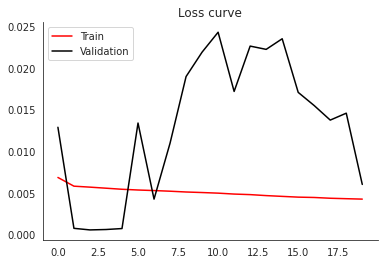

21/21 [==============================] - 1s 3ms/step


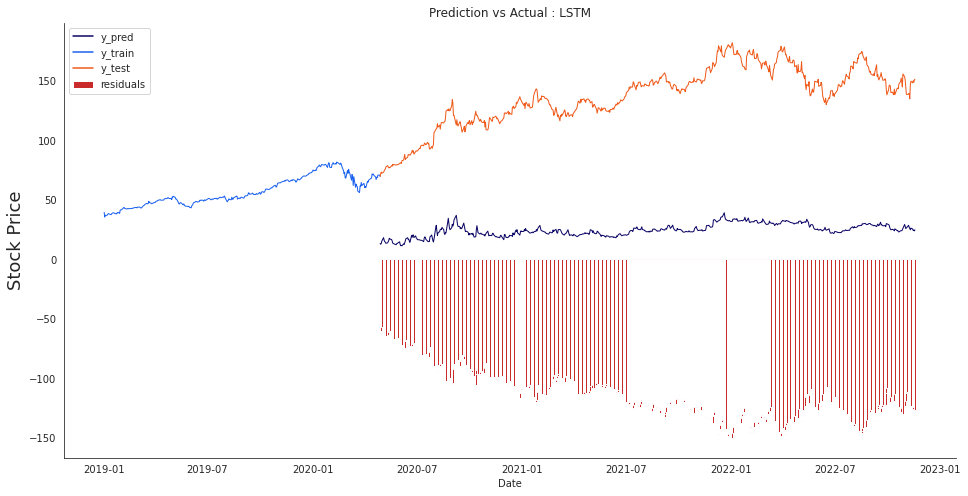

1/1 [==============================] - 0s 16ms/step


{'learning_rate': 0.0001,
 'epochs': 20,
 'batch_size': 4,
 'start_date': '2010-01-01',
 'symbol': 'AAPL',
 'sequence_length': 10,
 'mae': 12.316832536592228,
 'mape': 109.97026380949757,
 'mdape': 108.02179712244815,
 'mse': 184.59218847943868,
 'prediction_error': 126.65000061035155,
 'training_time': 95.55755496025085}

In [ ]:
# excluding close in prediction
features_columns = ['High', 'Low', 'Open', 'Volume']
learning_rate = 0.0001
epochs = 20 
batch_size = 4
start_date = '2010-01-01'
symbol = "AAPL"
sequence_length = 8
experiment_result = run_experiment(LSTM_MODEL, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length )
experiment_result

[*********************100%***********************]  1 of 1 completed
Epoch 1/20
647/647 [==============================] - 12s 7ms/step - loss: 0.0010 - val_loss: 9.5386e-04
Epoch 2/20
647/647 [==============================] - 3s 5ms/step - loss: 5.0015e-05 - val_loss: 0.0015
Epoch 3/20
647/647 [==============================] - 3s 5ms/step - loss: 5.0005e-05 - val_loss: 0.0014
Epoch 4/20
647/647 [==============================] - 3s 5ms/step - loss: 5.3644e-05 - val_loss: 0.0021
Epoch 5/20
647/647 [==============================] - 4s 5ms/step - loss: 4.8336e-05 - val_loss: 0.0034
Epoch 6/20
647/647 [==============================] - 3s 5ms/step - loss: 4.9631e-05 - val_loss: 0.0019
Epoch 7/20
647/647 [==============================] - 3s 5ms/step - loss: 4.7752e-05 - val_loss: 0.0022
Epoch 8/20
647/647 [==============================] - 4s 6ms/step - loss: 4.9296e-05 - val_loss: 0.0032
Epoch 9/20
647/647 [==============================] - 3s 5ms/step - loss: 4.8009e-05 - val_loss: 0

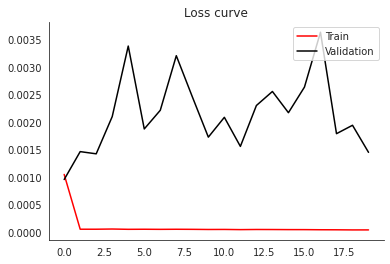

21/21 [==============================] - 1s 2ms/step


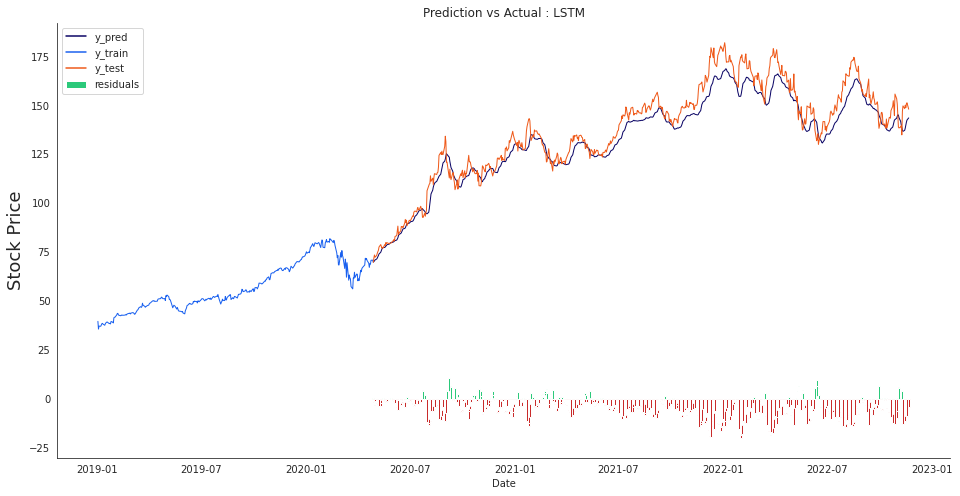

1/1 [==============================] - 0s 17ms/step


{'learning_rate': 0.0001,
 'epochs': 20,
 'batch_size': 4,
 'start_date': '2010-01-01',
 'symbol': 'AAPL',
 'sequence_length': 8,
 'mae': 5.257298955932053,
 'mape': 3.6503955174770835,
 'mdape': 3.282787123038218,
 'mse': 44.42921952219729,
 'prediction_error': 3.659993896484366,
 'training_time': 87.5593774318695}

In [ ]:
# including close in features
features_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
learning_rate = 0.0001
epochs = 20 
batch_size = 4
start_date = '2010-01-01'
symbol = "AAPL"
sequence_length = 8
experiment_result = run_experiment(LSTM_MODEL, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length )
experiment_result

[*********************100%***********************]  1 of 1 completed
Epoch 1/20
647/647 [==============================] - 8s 11ms/step - loss: 0.0045 - val_loss: 0.0255
Epoch 2/20
647/647 [==============================] - 7s 11ms/step - loss: 1.7536e-04 - val_loss: 0.0196
Epoch 3/20
647/647 [==============================] - 7s 11ms/step - loss: 1.2628e-04 - val_loss: 0.0089
Epoch 4/20
647/647 [==============================] - 7s 11ms/step - loss: 1.3479e-04 - val_loss: 0.0079
Epoch 5/20
647/647 [==============================] - 7s 11ms/step - loss: 9.8061e-05 - val_loss: 0.0091
Epoch 6/20
647/647 [==============================] - 7s 11ms/step - loss: 1.1078e-04 - val_loss: 0.0096
Epoch 7/20
647/647 [==============================] - 7s 11ms/step - loss: 9.3765e-05 - val_loss: 0.0098
Epoch 8/20
647/647 [==============================] - 8s 12ms/step - loss: 1.1242e-04 - val_loss: 0.0061
Epoch 9/20
647/647 [==============================] - 7s 11ms/step - loss: 8.3038e-05 - val_los

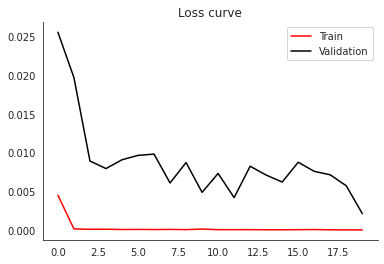

21/21 [==============================] - 0s 3ms/step


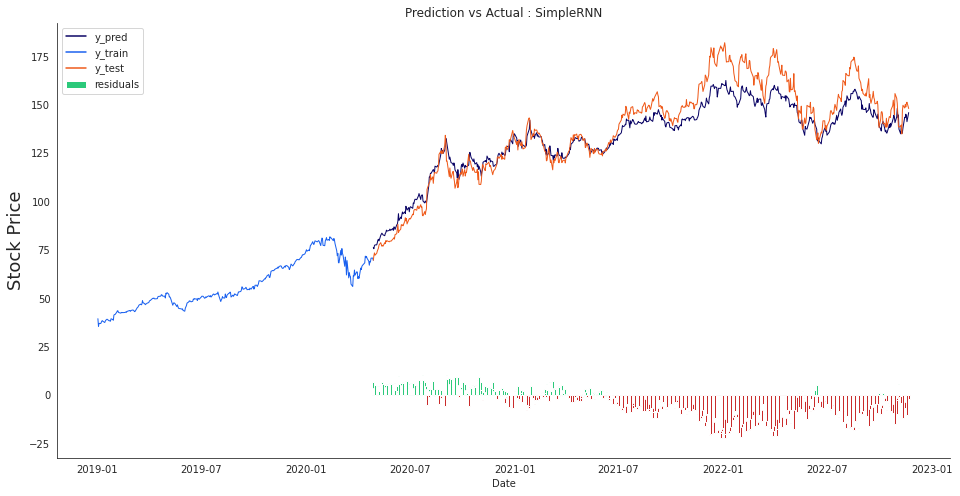

1/1 [==============================] - 0s 17ms/step


{'learning_rate': 0.0001,
 'epochs': 20,
 'batch_size': 4,
 'start_date': '2010-01-01',
 'symbol': 'AAPL',
 'sequence_length': 8,
 'mae': 6.368069641395416,
 'mape': 4.449155128626865,
 'mdape': 4.1226248025157535,
 'mse': 65.9468720770724,
 'prediction_error': 4.450002441406241,
 'training_time': 148.25442457199097}

In [ ]:
# including close in features, simmple RNN with sequence length 8
features_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
learning_rate = 0.0001
epochs = 20 
batch_size = 4
start_date = '2010-01-01'
symbol = "AAPL"
sequence_length = 8
experiment_result = run_experiment(SIMPLE_RNN_MODEL, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length )
experiment_result

[*********************100%***********************]  1 of 1 completed
Epoch 1/20
647/647 [==============================] - 7s 7ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 2/20
647/647 [==============================] - 3s 5ms/step - loss: 3.7140e-05 - val_loss: 7.2494e-04
Epoch 3/20
647/647 [==============================] - 3s 5ms/step - loss: 3.4924e-05 - val_loss: 6.3690e-04
Epoch 4/20
647/647 [==============================] - 3s 5ms/step - loss: 3.8029e-05 - val_loss: 6.1735e-04
Epoch 5/20
647/647 [==============================] - 3s 5ms/step - loss: 3.4657e-05 - val_loss: 6.6200e-04
Epoch 6/20
647/647 [==============================] - 3s 5ms/step - loss: 3.5048e-05 - val_loss: 5.7417e-04
Epoch 7/20
647/647 [==============================] - 3s 5ms/step - loss: 3.5478e-05 - val_loss: 6.8112e-04
Epoch 8/20
647/647 [==============================] - 3s 5ms/step - loss: 3.6267e-05 - val_loss: 5.2272e-04
Epoch 9/20
647/647 [==============================] - 3s 5ms/step - loss: 3

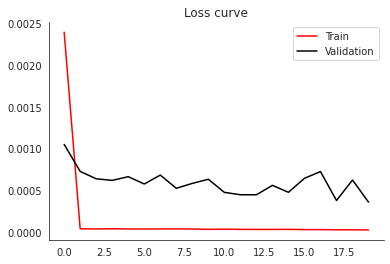

21/21 [==============================] - 1s 2ms/step


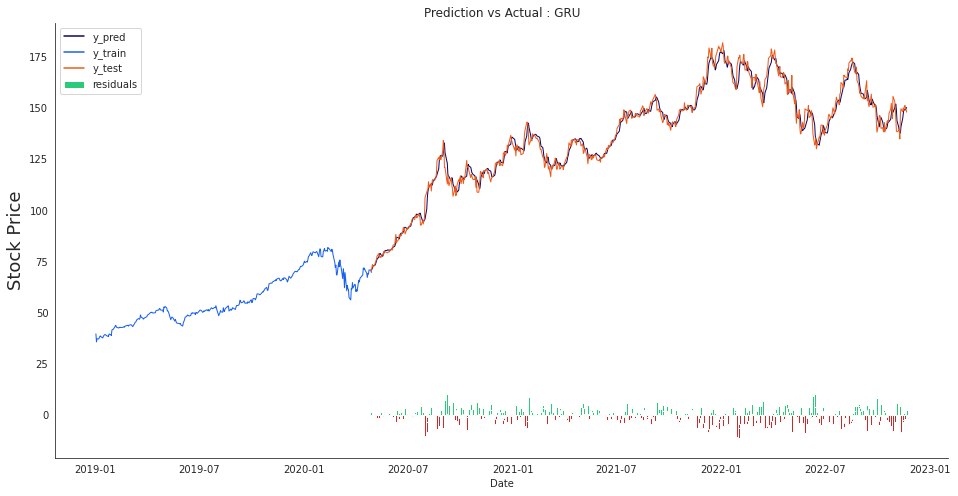

1/1 [==============================] - 0s 16ms/step


{'learning_rate': 0.0001,
 'epochs': 20,
 'batch_size': 4,
 'start_date': '2010-01-01',
 'symbol': 'AAPL',
 'sequence_length': 8,
 'mae': 2.4988132118260356,
 'mape': 1.8106996015107002,
 'mdape': 1.3903877971148495,
 'mse': 10.937994861670463,
 'prediction_error': 1.620004882812509,
 'training_time': 87.05193161964417}

In [ ]:
# including close in features, GRU RNN with sequence length 8
features_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
learning_rate = 0.0001
epochs = 20 
batch_size = 4
start_date = '2010-01-01'
symbol = "AAPL"
sequence_length = 8
experiment_result = run_experiment(GRU_MODEL, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length )
experiment_result

[*********************100%***********************]  1 of 1 completed
Epoch 1/20
647/647 [==============================] - 6s 6ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 2/20
647/647 [==============================] - 3s 5ms/step - loss: 2.5803e-05 - val_loss: 0.0016
Epoch 3/20
647/647 [==============================] - 3s 5ms/step - loss: 2.6594e-05 - val_loss: 0.0014
Epoch 4/20
647/647 [==============================] - 3s 5ms/step - loss: 2.8857e-05 - val_loss: 0.0011
Epoch 5/20
647/647 [==============================] - 3s 5ms/step - loss: 2.6531e-05 - val_loss: 0.0012
Epoch 6/20
647/647 [==============================] - 4s 6ms/step - loss: 2.7407e-05 - val_loss: 7.1711e-04
Epoch 7/20
647/647 [==============================] - 3s 5ms/step - loss: 2.6949e-05 - val_loss: 6.3255e-04
Epoch 8/20
647/647 [==============================] - 3s 4ms/step - loss: 2.7422e-05 - val_loss: 7.8409e-04
Epoch 9/20
647/647 [==============================] - 3s 5ms/step - loss: 2.6452e-05 - val_

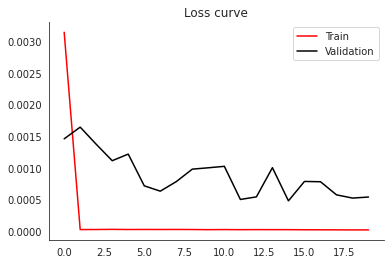

21/21 [==============================] - 1s 2ms/step


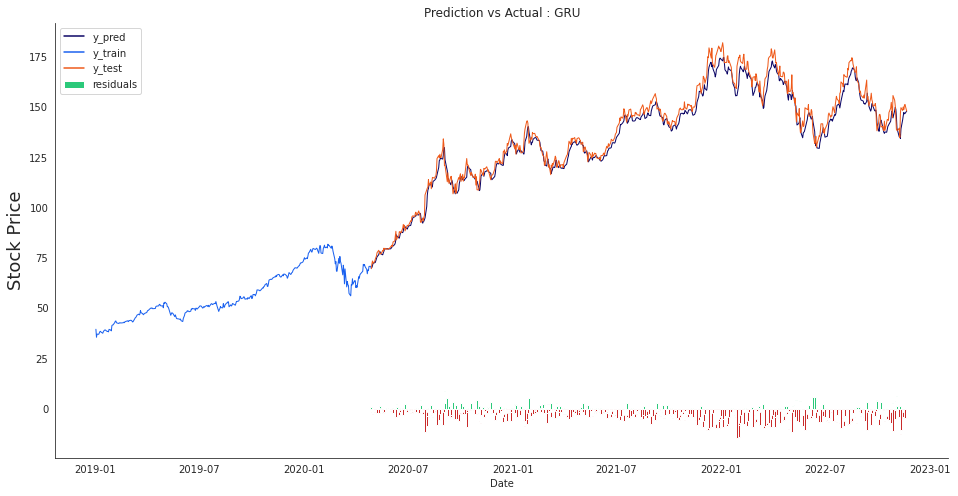

1/1 [==============================] - 0s 27ms/step


{'learning_rate': 0.0001,
 'epochs': 20,
 'batch_size': 4,
 'start_date': '2010-01-01',
 'symbol': 'AAPL',
 'sequence_length': 8,
 'mae': 3.170974778467775,
 'mape': 2.2368733689704623,
 'mdape': 1.9891901812640365,
 'mse': 16.56395385097242,
 'prediction_error': 1.2999932861328034,
 'training_time': 69.8968596458435}

In [42]:
# including close in features, GRUE with sequence length 8, feature column reduced (volume)
features_columns = ['High', 'Low', 'Open', 'Close']
learning_rate = 0.0001
epochs = 20 
batch_size = 4
start_date = '2010-01-01'
symbol = "AAPL"
sequence_length = 8
experiment_result = run_experiment(GRU_MODEL, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length )
experiment_result

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 9s 7ms/step - loss: 0.2348 - val_loss: 0.0894
Epoch 2/10
647/647 [==============================] - 4s 6ms/step - loss: 3.0691e-04 - val_loss: 0.0946
Epoch 3/10
647/647 [==============================] - 4s 6ms/step - loss: 3.3459e-04 - val_loss: 0.3011
Epoch 4/10
647/647 [==============================] - 4s 6ms/step - loss: 3.4094e-04 - val_loss: 0.6174
Epoch 5/10
647/647 [==============================] - 4s 6ms/step - loss: 3.7525e-04 - val_loss: 1.3128
Epoch 6/10
647/647 [==============================] - 4s 6ms/step - loss: 4.1036e-04 - val_loss: 0.9123
Epoch 7/10
647/647 [==============================] - 4s 6ms/step - loss: 2.8113e-04 - val_loss: 0.9431
Epoch 8/10
647/647 [==============================] - 4s 6ms/step - loss: 4.5792e-04 - val_loss: 0.4780
Epoch 9/10
647/647 [==============================] - 4s 6ms/step - loss: 3.1878e-04 - val_loss: 1.0202

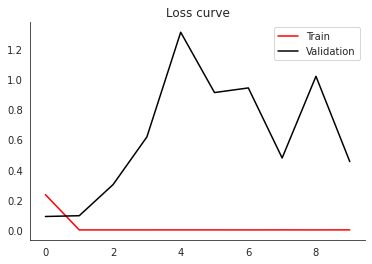

21/21 [==============================] - 1s 2ms/step


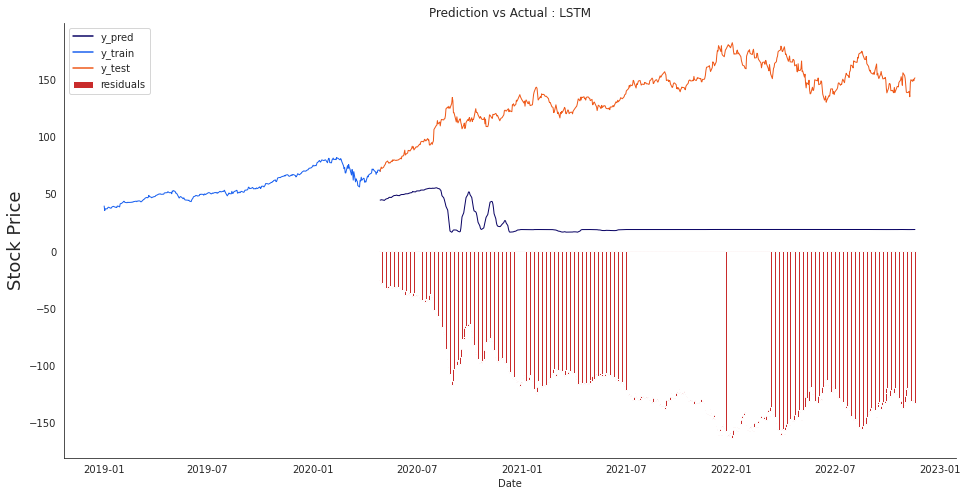

1/1 [==============================] - 0s 16ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 7s 7ms/step - loss: 5.4866e-04 - val_loss: 0.0147
Epoch 2/10
647/647 [==============================] - 4s 6ms/step - loss: 1.2959e-04 - val_loss: 0.0063
Epoch 3/10
647/647 [==============================] - 5s 7ms/step - loss: 9.0737e-05 - val_loss: 0.0098
Epoch 4/10
647/647 [==============================] - 4s 6ms/step - loss: 7.5788e-05 - val_loss: 0.0049
Epoch 5/10
647/647 [==============================] - 4s 6ms/step - loss: 5.4428e-05 - val_loss: 9.7859e-04
Epoch 6/10
647/647 [==============================] - 4s 6ms/step - loss: 1.1899e-04 - val_loss: 0.0034
Epoch 7/10
647/647 [==============================] - 4s 6ms/step - loss: 7.3751e-05 - val_loss: 0.0139
Epoch 8/10
647/647 [==============================] - 4s 6ms/step - loss: 7.4564e-05 - val_loss: 0.0083
Epoch 9/10
647/647 [=======================

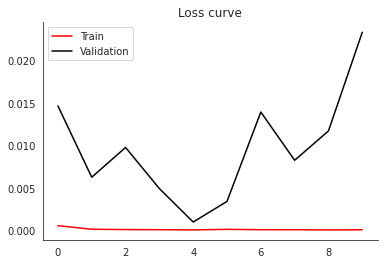

21/21 [==============================] - 1s 3ms/step


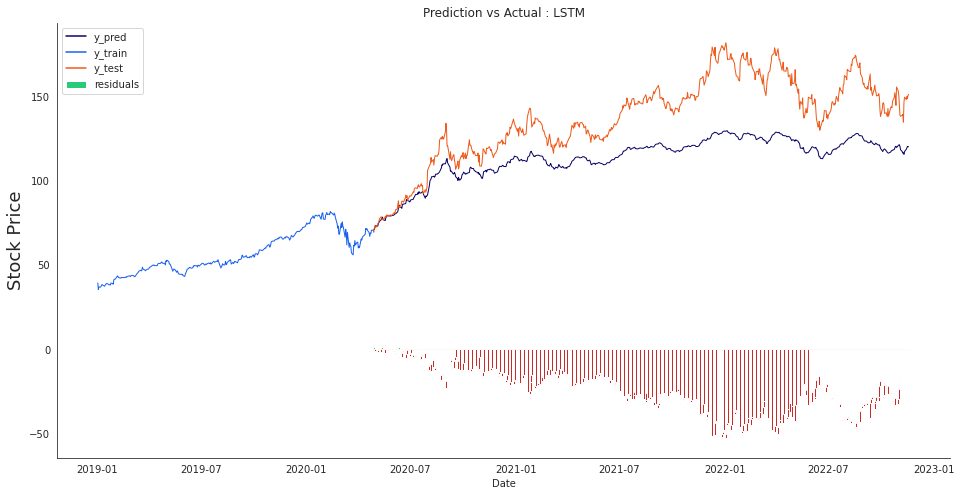

1/1 [==============================] - 0s 18ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 8s 8ms/step - loss: 1.8009e-04 - val_loss: 0.0022
Epoch 2/10
647/647 [==============================] - 4s 6ms/step - loss: 7.5664e-05 - val_loss: 8.0117e-04
Epoch 3/10
647/647 [==============================] - 4s 6ms/step - loss: 6.5905e-05 - val_loss: 0.0012
Epoch 4/10
647/647 [==============================] - 4s 6ms/step - loss: 6.2733e-05 - val_loss: 0.0027
Epoch 5/10
647/647 [==============================] - 5s 7ms/step - loss: 4.6582e-05 - val_loss: 6.0213e-04
Epoch 6/10
647/647 [==============================] - 4s 6ms/step - loss: 4.2080e-05 - val_loss: 0.0025
Epoch 7/10
647/647 [==============================] - 4s 6ms/step - loss: 4.5816e-05 - val_loss: 0.0028
Epoch 8/10
647/647 [==============================] - 4s 6ms/step - loss: 4.1692e-05 - val_loss: 8.1039e-04
Epoch 9/10
647/647 [===============

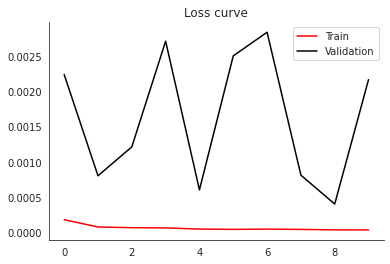

21/21 [==============================] - 1s 3ms/step


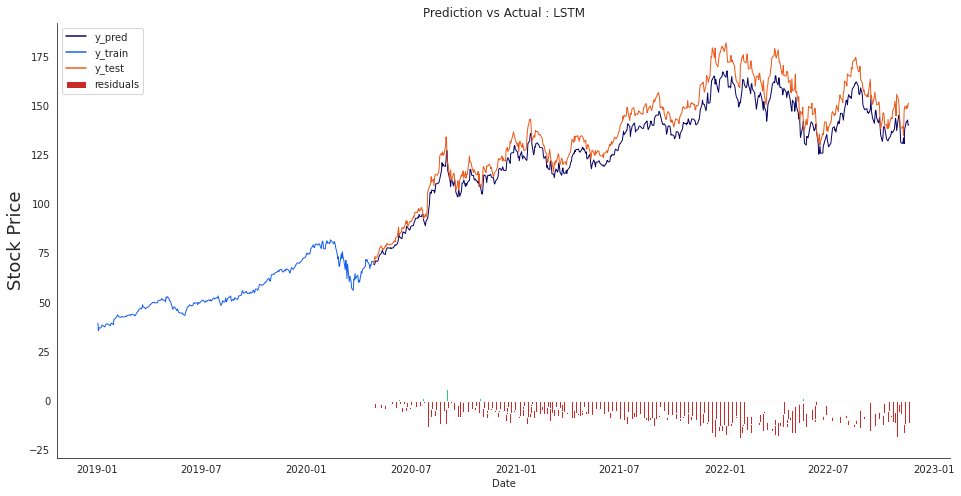

1/1 [==============================] - 0s 18ms/step
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 7s 7ms/step - loss: 4.9684e-04 - val_loss: 0.0020
Epoch 2/10
647/647 [==============================] - 4s 6ms/step - loss: 5.6303e-05 - val_loss: 0.0013
Epoch 3/10
647/647 [==============================] - 4s 6ms/step - loss: 5.5490e-05 - val_loss: 0.0016
Epoch 4/10
647/647 [==============================] - 4s 6ms/step - loss: 5.3516e-05 - val_loss: 0.0015
Epoch 5/10
647/647 [==============================] - 4s 6ms/step - loss: 5.2505e-05 - val_loss: 0.0017
Epoch 6/10
647/647 [==============================] - 4s 6ms/step - loss: 5.0945e-05 - val_loss: 0.0041
Epoch 7/10
647/647 [==============================] - 4s 6ms/step - loss: 5.0686e-05 - val_loss: 0.0043
Epoch 8/10
647/647 [==============================] - 4s 6ms/step - loss: 4.7022e-05 - val_loss: 0.0017
Epoch 9/10
647/647 [===========================

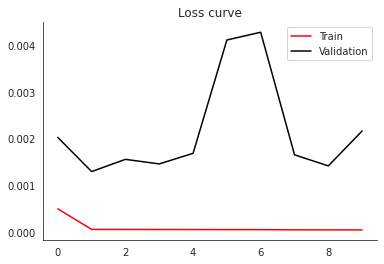

21/21 [==============================] - 1s 3ms/step


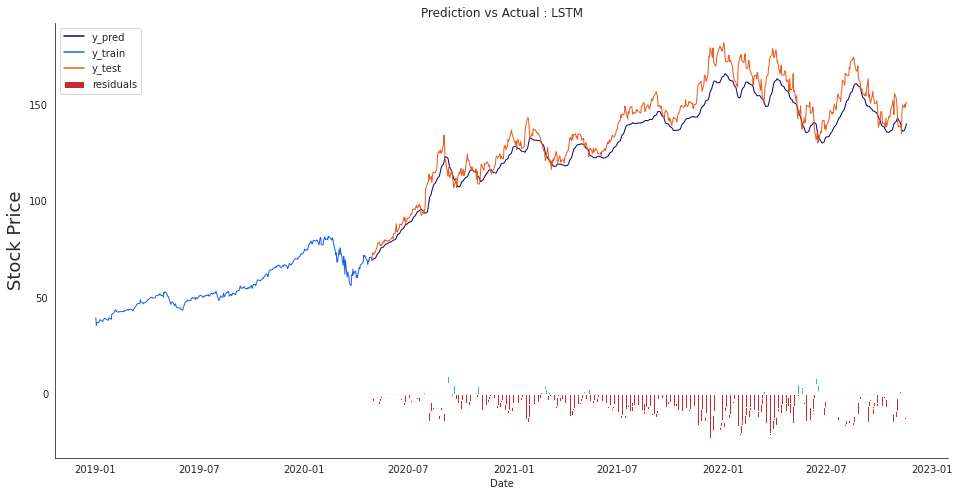

1/1 [==============================] - 0s 16ms/step


In [ ]:
# Learning Rate Experiment
features_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
epochs = 10 
batch_size = 4
start_date = '2010-01-01'
symbol = "AAPL"
sequence_length = 10
experiment_results_lr = []
for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    experiment_result = run_experiment(LSTM_MODEL, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length )
    experiment_results_lr.append(experiment_result)


In [ ]:
experiment_results_lr_df = pd.DataFrame(experiment_results_lr)
experiment_results_lr_df

,learning_rate,epochs,batch_size,start_date,symbol,sequence_length,mae,mape,mdape,mse,prediction_error,training_time
0,0.1000,10,4,2010-01-01,AAPL,10,113.078478,80.282024,86.620674,13931.699785,132.320001,47.130552
1,0.0100,10,4,2010-01-01,AAPL,10,23.458425,15.870462,16.484263,716.138788,30.410003,47.063108
2,0.0010,10,4,2010-01-01,AAPL,10,7.211670,5.058728,5.006072,66.349625,8.540000,88.237793
3,0.0001,10,4,2010-01-01,AAPL,10,6.709062,4.691384,4.357053,66.421542,10.290000,46.921488


Sequence length  1
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
649/649 [==============================] - 16s 7ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 2/10
649/649 [==============================] - 4s 6ms/step - loss: 7.8009e-05 - val_loss: 9.9442e-04
Epoch 3/10
649/649 [==============================] - 4s 6ms/step - loss: 3.1829e-05 - val_loss: 0.0040
Epoch 4/10
649/649 [==============================] - 4s 5ms/step - loss: 2.3518e-05 - val_loss: 0.0091
Epoch 5/10
649/649 [==============================] - 4s 7ms/step - loss: 2.4554e-05 - val_loss: 0.0109
Epoch 6/10
649/649 [==============================] - 4s 6ms/step - loss: 2.2247e-05 - val_loss: 0.0113
Epoch 7/10
649/649 [==============================] - 3s 5ms/step - loss: 2.3276e-05 - val_loss: 0.0100
Epoch 8/10
649/649 [==============================] - 4s 6ms/step - loss: 2.5377e-05 - val_loss: 0.0093
Epoch 9/10
649/649 [==============================] - 4s 6ms/step - loss: 2.552

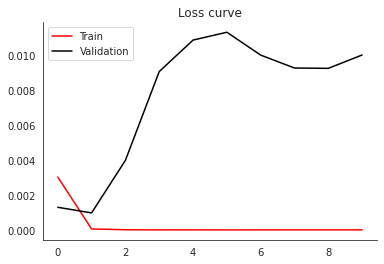

21/21 [==============================] - 1s 2ms/step


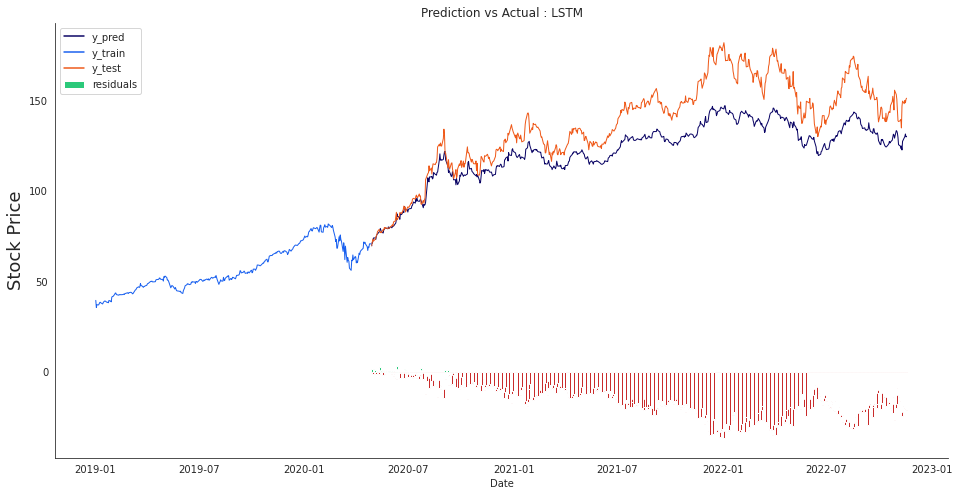

1/1 [==============================] - 0s 32ms/step
Sequence length  2
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
649/649 [==============================] - 9s 10ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 2/10
649/649 [==============================] - 4s 5ms/step - loss: 3.3765e-05 - val_loss: 0.0036
Epoch 3/10
649/649 [==============================] - 4s 7ms/step - loss: 2.7026e-05 - val_loss: 0.0056
Epoch 4/10
649/649 [==============================] - 4s 7ms/step - loss: 3.0692e-05 - val_loss: 0.0081
Epoch 5/10
649/649 [==============================] - 4s 6ms/step - loss: 2.8953e-05 - val_loss: 0.0099
Epoch 6/10
649/649 [==============================] - 4s 5ms/step - loss: 3.0121e-05 - val_loss: 0.0096
Epoch 7/10
649/649 [==============================] - 4s 6ms/step - loss: 3.0873e-05 - val_loss: 0.0096
Epoch 8/10
649/649 [==============================] - 4s 6ms/step - loss: 2.8847e-05 - val_loss: 0.0086
Epoch 9/10
649/649 [===========

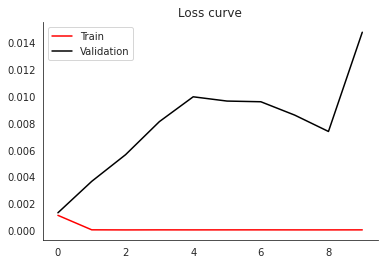

21/21 [==============================] - 1s 2ms/step


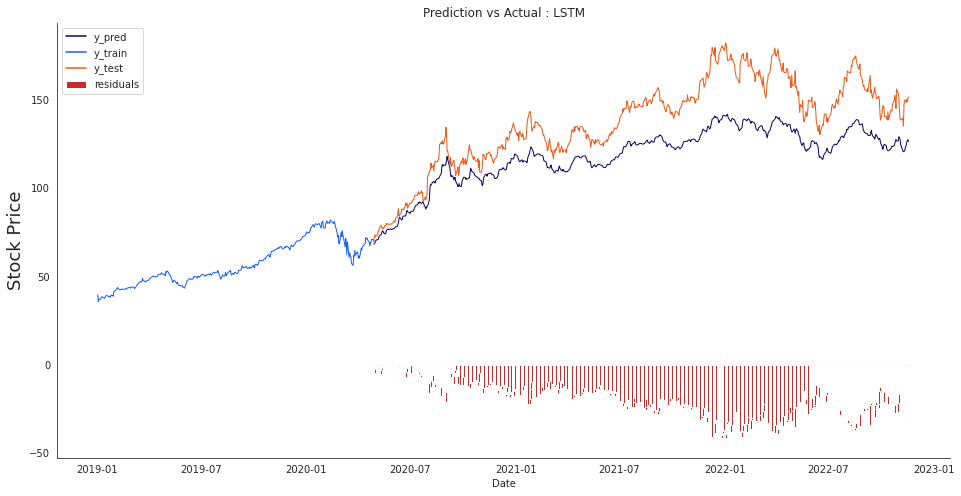

1/1 [==============================] - 0s 20ms/step
Sequence length  3
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
649/649 [==============================] - 7s 7ms/step - loss: 9.1468e-04 - val_loss: 6.4974e-04
Epoch 2/10
649/649 [==============================] - 4s 6ms/step - loss: 3.6361e-05 - val_loss: 0.0045
Epoch 3/10
649/649 [==============================] - 4s 7ms/step - loss: 3.5291e-05 - val_loss: 0.0104
Epoch 4/10
649/649 [==============================] - 4s 6ms/step - loss: 4.1058e-05 - val_loss: 0.0055
Epoch 5/10
649/649 [==============================] - 4s 6ms/step - loss: 4.1769e-05 - val_loss: 0.0032
Epoch 6/10
649/649 [==============================] - 4s 6ms/step - loss: 3.9322e-05 - val_loss: 0.0074
Epoch 7/10
649/649 [==============================] - 4s 6ms/step - loss: 3.9000e-05 - val_loss: 0.0102
Epoch 8/10
649/649 [==============================] - 4s 6ms/step - loss: 3.6930e-05 - val_loss: 0.0120
Epoch 9/10
649/649 [====

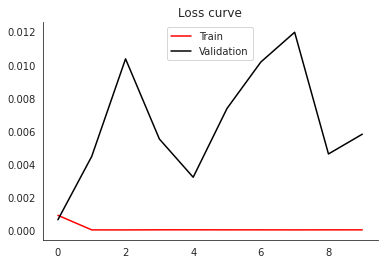

21/21 [==============================] - 1s 3ms/step


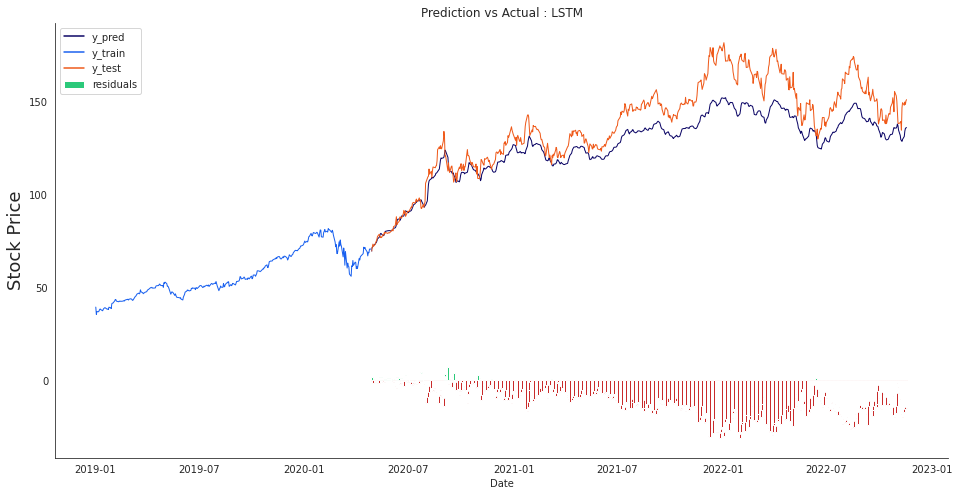

1/1 [==============================] - 0s 16ms/step
Sequence length  4
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
648/648 [==============================] - 6s 6ms/step - loss: 2.0830e-04 - val_loss: 0.0011
Epoch 2/10
648/648 [==============================] - 3s 5ms/step - loss: 5.0202e-05 - val_loss: 0.0066
Epoch 3/10
648/648 [==============================] - 3s 5ms/step - loss: 4.4558e-05 - val_loss: 0.0070
Epoch 4/10
648/648 [==============================] - 3s 5ms/step - loss: 5.2019e-05 - val_loss: 0.0040
Epoch 5/10
648/648 [==============================] - 3s 5ms/step - loss: 4.4624e-05 - val_loss: 0.0034
Epoch 6/10
648/648 [==============================] - 4s 5ms/step - loss: 4.9790e-05 - val_loss: 0.0063
Epoch 7/10
648/648 [==============================] - 4s 5ms/step - loss: 4.0139e-05 - val_loss: 0.0060
Epoch 8/10
648/648 [==============================] - 4s 5ms/step - loss: 4.1039e-05 - val_loss: 0.0049
Epoch 9/10
648/648 [========

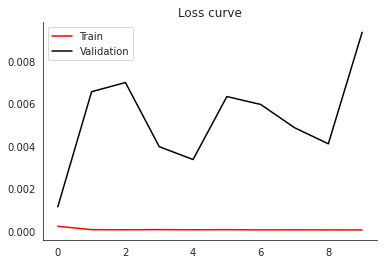

21/21 [==============================] - 1s 3ms/step


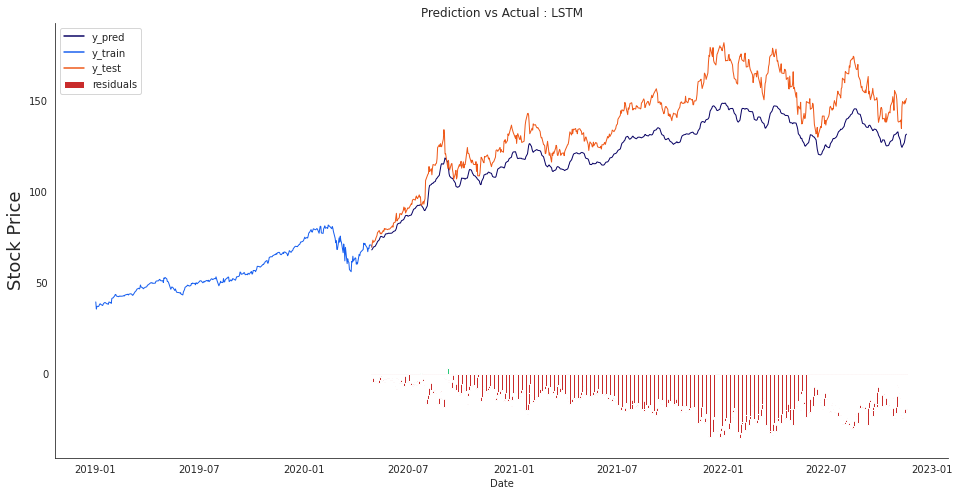

1/1 [==============================] - 0s 15ms/step
Sequence length  5
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
648/648 [==============================] - 7s 7ms/step - loss: 4.0202e-04 - val_loss: 0.0051
Epoch 2/10
648/648 [==============================] - 4s 6ms/step - loss: 5.1318e-05 - val_loss: 0.0039
Epoch 3/10
648/648 [==============================] - 4s 6ms/step - loss: 5.5983e-05 - val_loss: 0.0062
Epoch 4/10
648/648 [==============================] - 4s 6ms/step - loss: 5.1346e-05 - val_loss: 0.0033
Epoch 5/10
648/648 [==============================] - 4s 6ms/step - loss: 4.8217e-05 - val_loss: 0.0098
Epoch 6/10
648/648 [==============================] - 4s 6ms/step - loss: 4.4711e-05 - val_loss: 0.0050
Epoch 7/10
648/648 [==============================] - 4s 6ms/step - loss: 4.9346e-05 - val_loss: 0.0038
Epoch 8/10
648/648 [==============================] - 4s 6ms/step - loss: 4.2718e-05 - val_loss: 0.0084
Epoch 9/10
648/648 [========

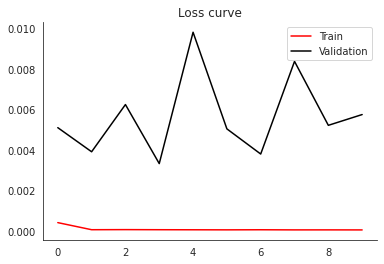

21/21 [==============================] - 1s 2ms/step


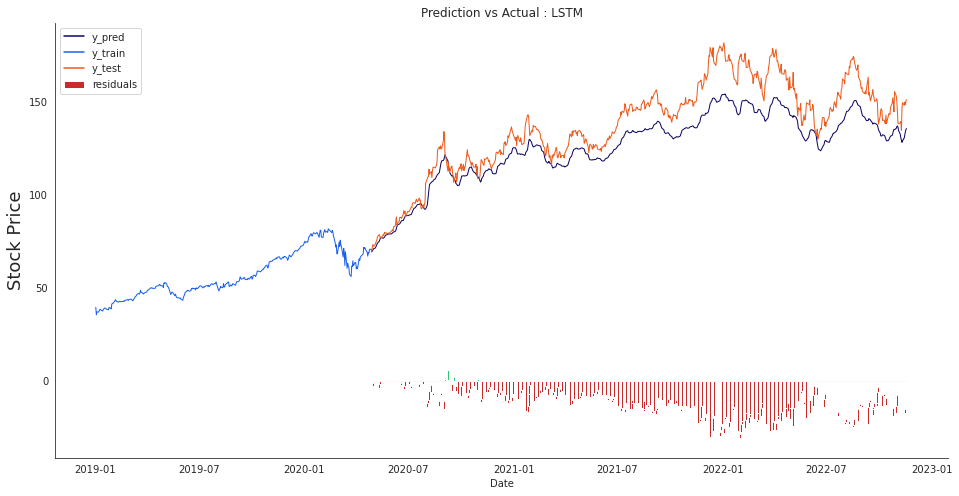

1/1 [==============================] - 0s 15ms/step
Sequence length  6
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
648/648 [==============================] - 8s 8ms/step - loss: 3.3595e-04 - val_loss: 0.0120
Epoch 2/10
648/648 [==============================] - 4s 6ms/step - loss: 5.8732e-05 - val_loss: 0.0044
Epoch 3/10
648/648 [==============================] - 4s 7ms/step - loss: 5.6598e-05 - val_loss: 0.0030
Epoch 4/10
648/648 [==============================] - 4s 6ms/step - loss: 5.9163e-05 - val_loss: 0.0033
Epoch 5/10
648/648 [==============================] - 4s 7ms/step - loss: 5.3264e-05 - val_loss: 0.0019
Epoch 6/10
648/648 [==============================] - 4s 6ms/step - loss: 4.9151e-05 - val_loss: 0.0050
Epoch 7/10
648/648 [==============================] - 4s 6ms/step - loss: 4.9946e-05 - val_loss: 0.0089
Epoch 8/10
648/648 [==============================] - 4s 6ms/step - loss: 4.9220e-05 - val_loss: 0.0032
Epoch 9/10
648/648 [========

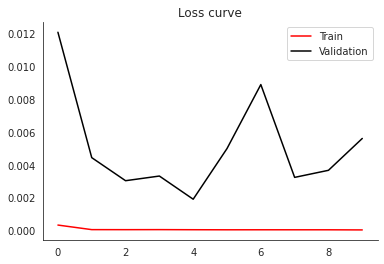

21/21 [==============================] - 1s 3ms/step


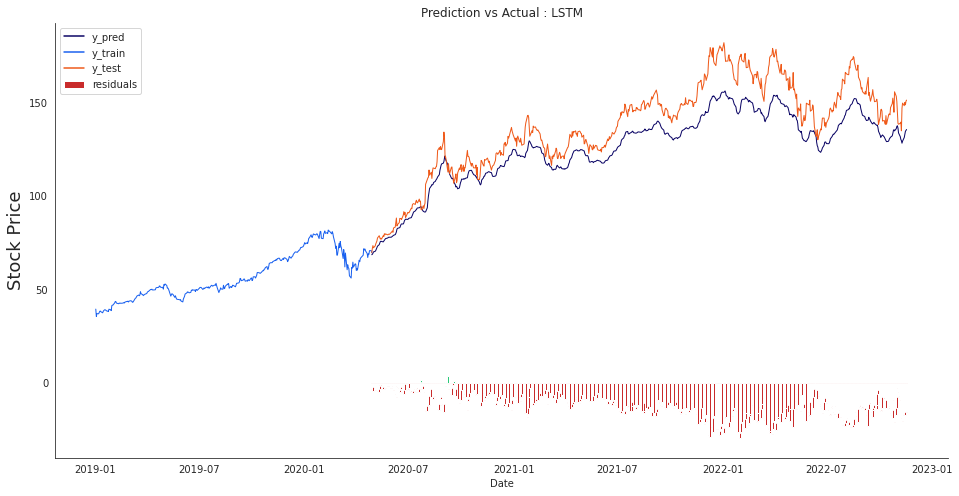

1/1 [==============================] - 0s 19ms/step
Sequence length  7
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
648/648 [==============================] - 8s 8ms/step - loss: 1.8187e-04 - val_loss: 0.0019
Epoch 2/10
648/648 [==============================] - 4s 6ms/step - loss: 6.8638e-05 - val_loss: 9.1688e-04
Epoch 3/10
648/648 [==============================] - 4s 6ms/step - loss: 6.5079e-05 - val_loss: 0.0021
Epoch 4/10
648/648 [==============================] - 5s 7ms/step - loss: 5.5124e-05 - val_loss: 0.0018
Epoch 5/10
648/648 [==============================] - 5s 7ms/step - loss: 5.8379e-05 - val_loss: 0.0016
Epoch 6/10
648/648 [==============================] - 4s 7ms/step - loss: 5.5380e-05 - val_loss: 0.0015
Epoch 7/10
648/648 [==============================] - 4s 6ms/step - loss: 4.3942e-05 - val_loss: 0.0016
Epoch 8/10
648/648 [==============================] - 4s 7ms/step - loss: 4.4416e-05 - val_loss: 0.0036
Epoch 9/10
648/648 [====

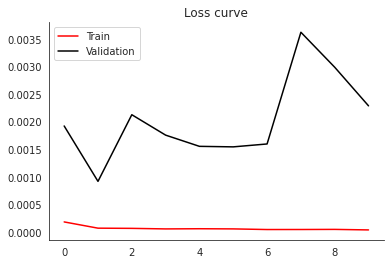

21/21 [==============================] - 1s 3ms/step


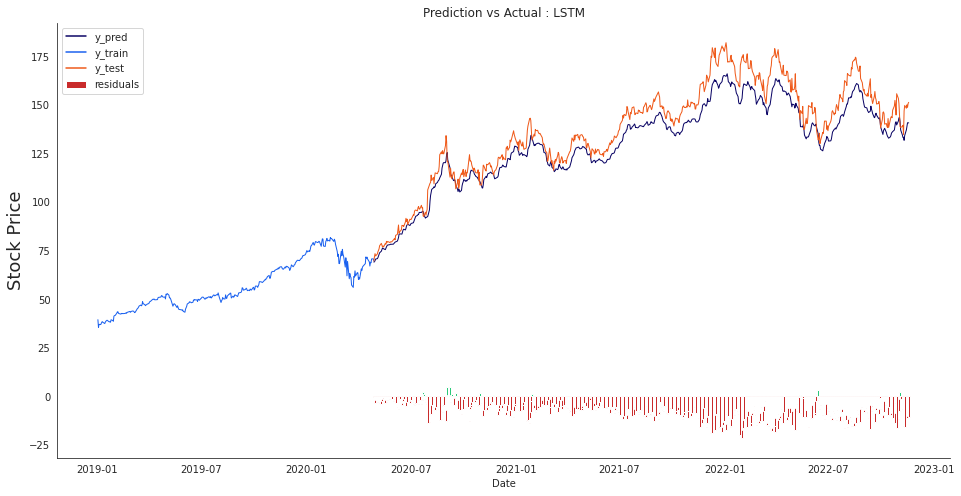

1/1 [==============================] - 0s 16ms/step
Sequence length  8
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 6s 7ms/step - loss: 2.5939e-04 - val_loss: 0.0035
Epoch 2/10
647/647 [==============================] - 4s 6ms/step - loss: 6.6694e-05 - val_loss: 0.0137
Epoch 3/10
647/647 [==============================] - 4s 6ms/step - loss: 6.1542e-05 - val_loss: 0.0016
Epoch 4/10
647/647 [==============================] - 4s 6ms/step - loss: 7.2458e-05 - val_loss: 0.0038
Epoch 5/10
647/647 [==============================] - 4s 6ms/step - loss: 5.9575e-05 - val_loss: 0.0025
Epoch 6/10
647/647 [==============================] - 4s 6ms/step - loss: 4.6681e-05 - val_loss: 9.6771e-04
Epoch 7/10
647/647 [==============================] - 4s 6ms/step - loss: 5.7074e-05 - val_loss: 0.0031
Epoch 8/10
647/647 [==============================] - 4s 6ms/step - loss: 4.9716e-05 - val_loss: 0.0013
Epoch 9/10
647/647 [====

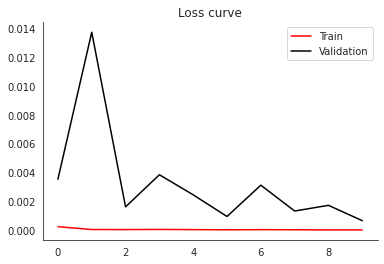

21/21 [==============================] - 1s 3ms/step


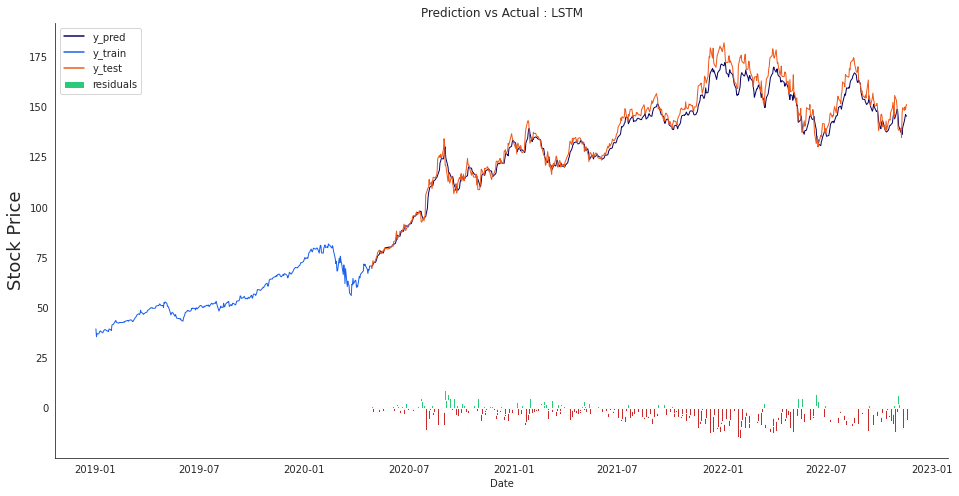

1/1 [==============================] - 0s 18ms/step
Sequence length  9
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 8s 8ms/step - loss: 2.6065e-04 - val_loss: 9.3566e-04
Epoch 2/10
647/647 [==============================] - 4s 7ms/step - loss: 7.5753e-05 - val_loss: 8.6280e-04
Epoch 3/10
647/647 [==============================] - 4s 7ms/step - loss: 6.7840e-05 - val_loss: 7.1873e-04
Epoch 4/10
647/647 [==============================] - 4s 7ms/step - loss: 6.5658e-05 - val_loss: 0.0011
Epoch 5/10
647/647 [==============================] - 5s 7ms/step - loss: 6.0508e-05 - val_loss: 0.0011
Epoch 6/10
647/647 [==============================] - 4s 7ms/step - loss: 5.0227e-05 - val_loss: 0.0011
Epoch 7/10
647/647 [==============================] - 4s 7ms/step - loss: 4.6397e-05 - val_loss: 4.3140e-04
Epoch 8/10
647/647 [==============================] - 4s 7ms/step - loss: 4.5237e-05 - val_loss: 5.1689e-04
Epoch 9/

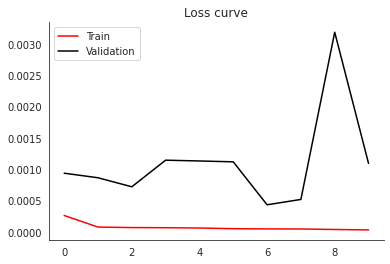

21/21 [==============================] - 1s 4ms/step


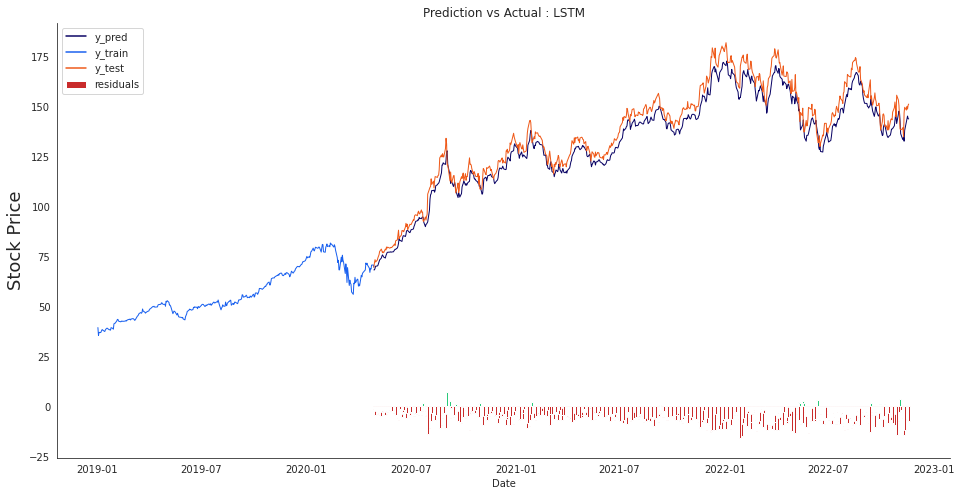

1/1 [==============================] - 0s 19ms/step
Sequence length  10
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 9s 8ms/step - loss: 1.8009e-04 - val_loss: 0.0022
Epoch 2/10
647/647 [==============================] - 4s 7ms/step - loss: 7.5664e-05 - val_loss: 8.0117e-04
Epoch 3/10
647/647 [==============================] - 5s 7ms/step - loss: 6.5905e-05 - val_loss: 0.0012
Epoch 4/10
647/647 [==============================] - 5s 7ms/step - loss: 6.2733e-05 - val_loss: 0.0027
Epoch 5/10
647/647 [==============================] - 5s 7ms/step - loss: 4.6582e-05 - val_loss: 6.0213e-04
Epoch 6/10
647/647 [==============================] - 5s 7ms/step - loss: 4.2080e-05 - val_loss: 0.0025
Epoch 7/10
647/647 [==============================] - 5s 7ms/step - loss: 4.5816e-05 - val_loss: 0.0028
Epoch 8/10
647/647 [==============================] - 4s 7ms/step - loss: 4.1692e-05 - val_loss: 8.1039e-04
Epoch 9/10
647/

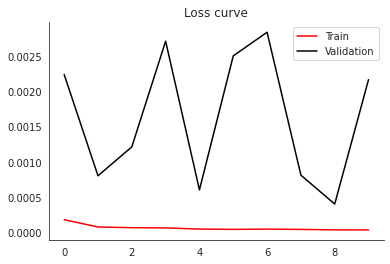

21/21 [==============================] - 1s 3ms/step


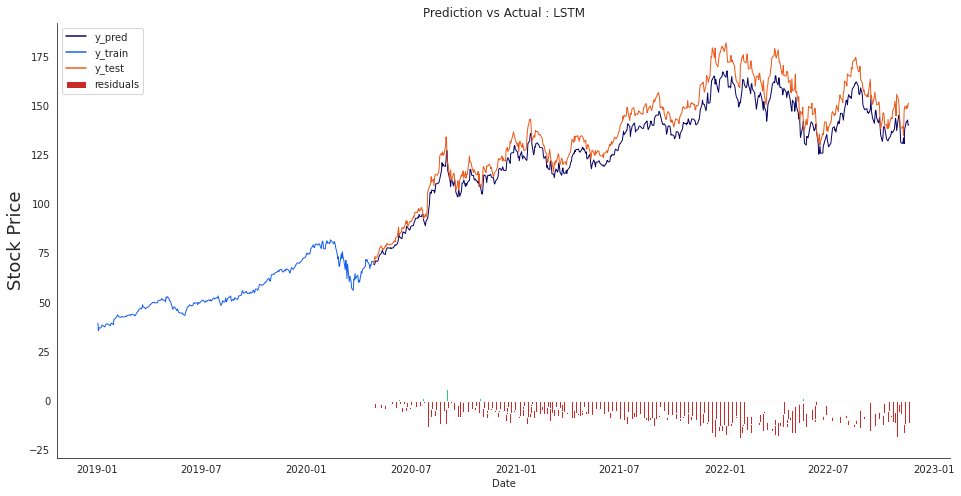

1/1 [==============================] - 0s 21ms/step
Sequence length  11
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
647/647 [==============================] - 8s 8ms/step - loss: 1.5125e-04 - val_loss: 9.7736e-04
Epoch 2/10
647/647 [==============================] - 4s 7ms/step - loss: 7.4635e-05 - val_loss: 0.0043
Epoch 3/10
647/647 [==============================] - 5s 7ms/step - loss: 6.8287e-05 - val_loss: 6.0340e-04
Epoch 4/10
647/647 [==============================] - 5s 7ms/step - loss: 5.0759e-05 - val_loss: 6.2353e-04
Epoch 5/10
647/647 [==============================] - 4s 7ms/step - loss: 4.2755e-05 - val_loss: 4.8661e-04
Epoch 6/10
647/647 [==============================] - 4s 7ms/step - loss: 4.5627e-05 - val_loss: 5.3708e-04
Epoch 7/10
647/647 [==============================] - 5s 7ms/step - loss: 3.7056e-05 - val_loss: 3.3992e-04
Epoch 8/10
647/647 [==============================] - 5s 8ms/step - loss: 4.5191e-05 - val_loss: 4.2252e-04

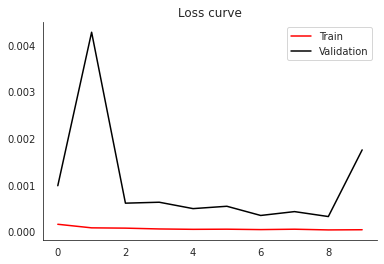

21/21 [==============================] - 1s 4ms/step


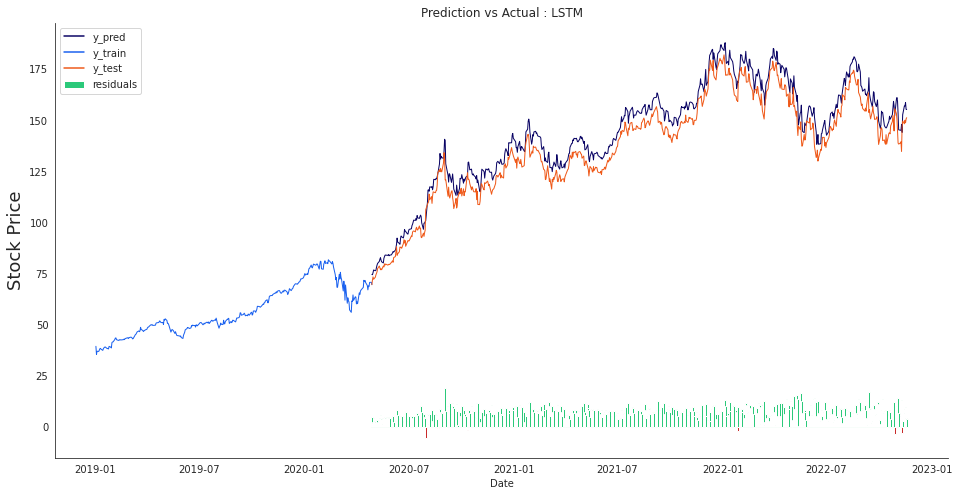

1/1 [==============================] - 0s 30ms/step
Sequence length  12
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
646/646 [==============================] - 7s 7ms/step - loss: 2.3757e-04 - val_loss: 0.0014
Epoch 2/10
646/646 [==============================] - 4s 6ms/step - loss: 8.1750e-05 - val_loss: 0.0043
Epoch 3/10
646/646 [==============================] - 4s 7ms/step - loss: 6.2130e-05 - val_loss: 6.6929e-04
Epoch 4/10
646/646 [==============================] - 4s 6ms/step - loss: 6.1604e-05 - val_loss: 5.7409e-04
Epoch 5/10
646/646 [==============================] - 4s 6ms/step - loss: 6.3617e-05 - val_loss: 0.0044
Epoch 6/10
646/646 [==============================] - 4s 6ms/step - loss: 4.7952e-05 - val_loss: 4.5723e-04
Epoch 7/10
646/646 [==============================] - 4s 6ms/step - loss: 5.3259e-05 - val_loss: 0.0012
Epoch 8/10
646/646 [==============================] - 4s 7ms/step - loss: 3.9431e-05 - val_loss: 0.0012
Epoch 9/10
646/

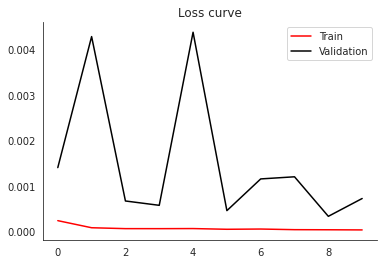

21/21 [==============================] - 1s 3ms/step


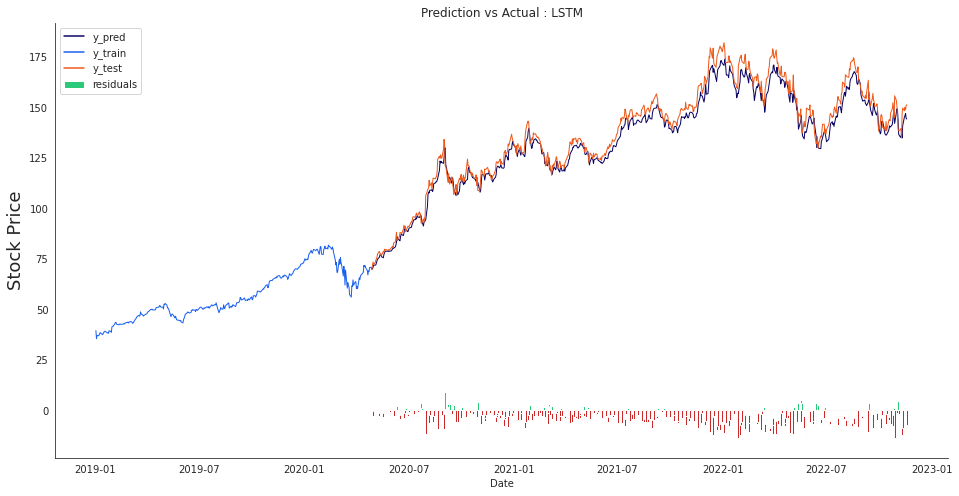

1/1 [==============================] - 0s 16ms/step
Sequence length  13
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
646/646 [==============================] - 8s 9ms/step - loss: 2.1419e-04 - val_loss: 0.0010
Epoch 2/10
646/646 [==============================] - 5s 8ms/step - loss: 8.9344e-05 - val_loss: 8.8720e-04
Epoch 3/10
646/646 [==============================] - 5s 7ms/step - loss: 6.3471e-05 - val_loss: 8.7109e-04
Epoch 4/10
646/646 [==============================] - 5s 7ms/step - loss: 6.5284e-05 - val_loss: 0.0029
Epoch 5/10
646/646 [==============================] - 5s 8ms/step - loss: 4.6724e-05 - val_loss: 6.1490e-04
Epoch 6/10
646/646 [==============================] - 5s 7ms/step - loss: 4.6185e-05 - val_loss: 5.7042e-04
Epoch 7/10
646/646 [==============================] - 5s 7ms/step - loss: 4.6659e-05 - val_loss: 3.8004e-04
Epoch 8/10
646/646 [==============================] - 5s 7ms/step - loss: 4.4126e-05 - val_loss: 4.9624e-04
Epo

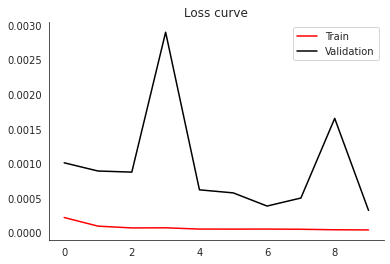

21/21 [==============================] - 1s 4ms/step


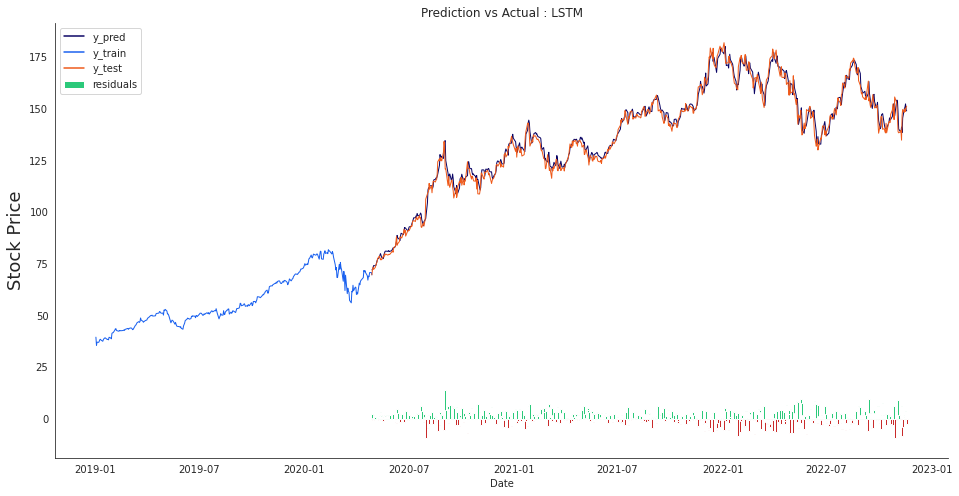

1/1 [==============================] - 0s 17ms/step
Sequence length  14
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
646/646 [==============================] - 9s 9ms/step - loss: 2.1760e-04 - val_loss: 0.0012
Epoch 2/10
646/646 [==============================] - 5s 8ms/step - loss: 8.3693e-05 - val_loss: 0.0011
Epoch 3/10
646/646 [==============================] - 5s 7ms/step - loss: 5.8820e-05 - val_loss: 6.1433e-04
Epoch 4/10
646/646 [==============================] - 5s 7ms/step - loss: 5.7206e-05 - val_loss: 6.5547e-04
Epoch 5/10
646/646 [==============================] - 5s 7ms/step - loss: 5.3685e-05 - val_loss: 8.7265e-04
Epoch 6/10
646/646 [==============================] - 5s 8ms/step - loss: 4.7000e-05 - val_loss: 6.4249e-04
Epoch 7/10
646/646 [==============================] - 6s 9ms/step - loss: 4.7512e-05 - val_loss: 9.2190e-04
Epoch 8/10
646/646 [==============================] - 5s 7ms/step - loss: 4.1594e-05 - val_loss: 4.2913e-04
Epo

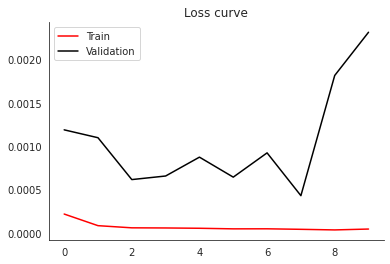

21/21 [==============================] - 1s 3ms/step


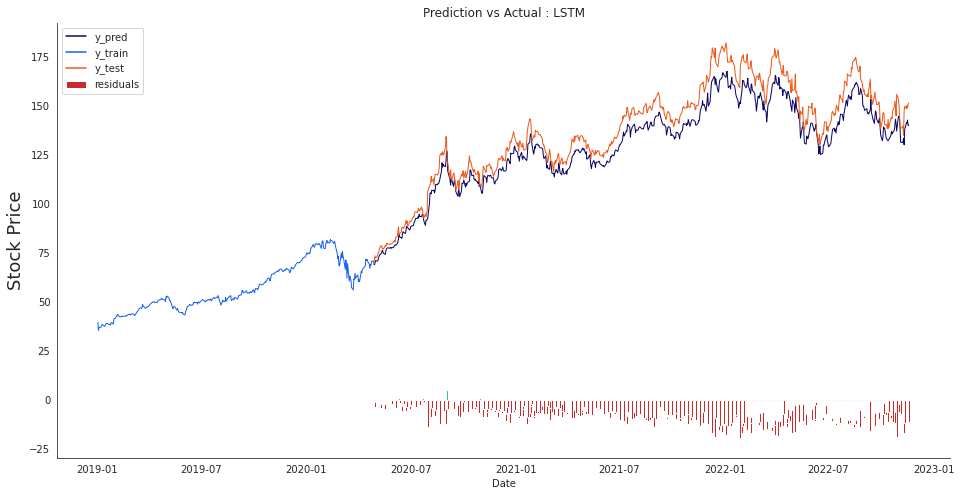

1/1 [==============================] - 0s 19ms/step
Sequence length  15
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
646/646 [==============================] - 8s 9ms/step - loss: 2.4274e-04 - val_loss: 0.0020
Epoch 2/10
646/646 [==============================] - 5s 8ms/step - loss: 6.6799e-05 - val_loss: 0.0030
Epoch 3/10
646/646 [==============================] - 5s 8ms/step - loss: 6.6190e-05 - val_loss: 5.7314e-04
Epoch 4/10
646/646 [==============================] - 5s 8ms/step - loss: 5.5324e-05 - val_loss: 5.2548e-04
Epoch 5/10
646/646 [==============================] - 5s 8ms/step - loss: 5.0740e-05 - val_loss: 4.7003e-04
Epoch 6/10
646/646 [==============================] - 5s 8ms/step - loss: 5.6589e-05 - val_loss: 4.3183e-04
Epoch 7/10
646/646 [==============================] - 5s 8ms/step - loss: 4.1119e-05 - val_loss: 0.0028
Epoch 8/10
646/646 [==============================] - 6s 9ms/step - loss: 4.5502e-05 - val_loss: 4.2281e-04
Epoch 9

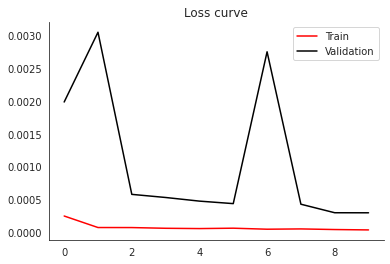

21/21 [==============================] - 1s 3ms/step


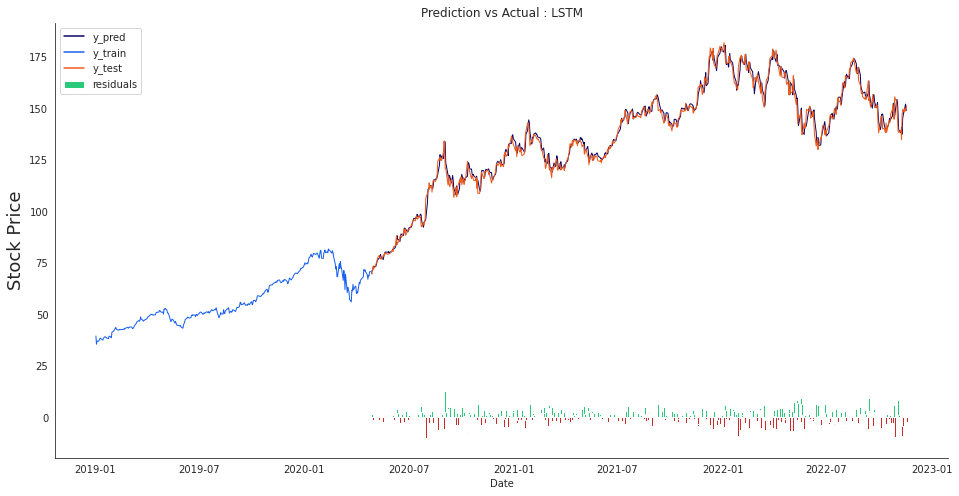

1/1 [==============================] - 0s 16ms/step
Sequence length  16
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
645/645 [==============================] - 7s 8ms/step - loss: 2.0354e-04 - val_loss: 8.6559e-04
Epoch 2/10
645/645 [==============================] - 4s 7ms/step - loss: 7.4965e-05 - val_loss: 0.0016
Epoch 3/10
645/645 [==============================] - 4s 6ms/step - loss: 7.0922e-05 - val_loss: 6.7554e-04
Epoch 4/10
645/645 [==============================] - 4s 6ms/step - loss: 5.2951e-05 - val_loss: 0.0045
Epoch 5/10
645/645 [==============================] - 4s 7ms/step - loss: 5.5642e-05 - val_loss: 9.4164e-04
Epoch 6/10
645/645 [==============================] - 4s 7ms/step - loss: 4.5194e-05 - val_loss: 5.9734e-04
Epoch 7/10
645/645 [==============================] - 4s 6ms/step - loss: 3.6682e-05 - val_loss: 3.9494e-04
Epoch 8/10
645/645 [==============================] - 4s 7ms/step - loss: 4.2401e-05 - val_loss: 5.4501e-04
Epo

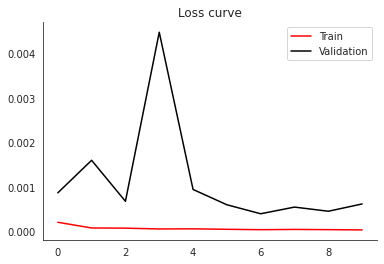

21/21 [==============================] - 1s 4ms/step


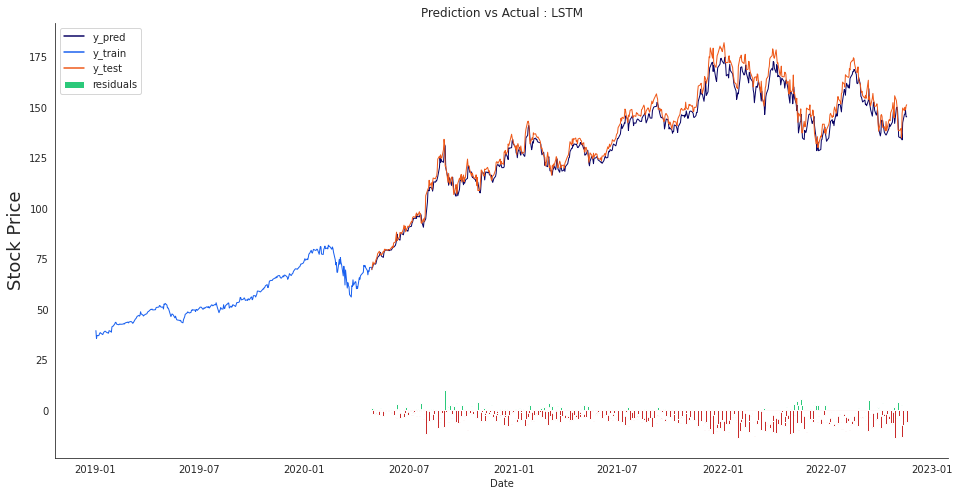

1/1 [==============================] - 0s 25ms/step
Sequence length  17
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
645/645 [==============================] - 9s 9ms/step - loss: 2.3158e-04 - val_loss: 0.0033
Epoch 2/10
645/645 [==============================] - 5s 8ms/step - loss: 6.6080e-05 - val_loss: 7.6761e-04
Epoch 3/10
645/645 [==============================] - 5s 8ms/step - loss: 6.5040e-05 - val_loss: 6.6523e-04
Epoch 4/10
645/645 [==============================] - 6s 9ms/step - loss: 5.6503e-05 - val_loss: 5.9902e-04
Epoch 5/10
645/645 [==============================] - 5s 8ms/step - loss: 4.1857e-05 - val_loss: 4.0110e-04
Epoch 6/10
645/645 [==============================] - 5s 8ms/step - loss: 4.4355e-05 - val_loss: 5.8109e-04
Epoch 7/10
645/645 [==============================] - 5s 8ms/step - loss: 4.4429e-05 - val_loss: 3.1746e-04
Epoch 8/10
645/645 [==============================] - 5s 8ms/step - loss: 3.9843e-05 - val_loss: 6.4156e-04

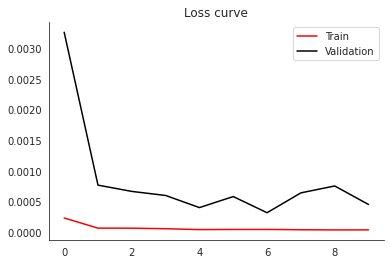

21/21 [==============================] - 1s 4ms/step


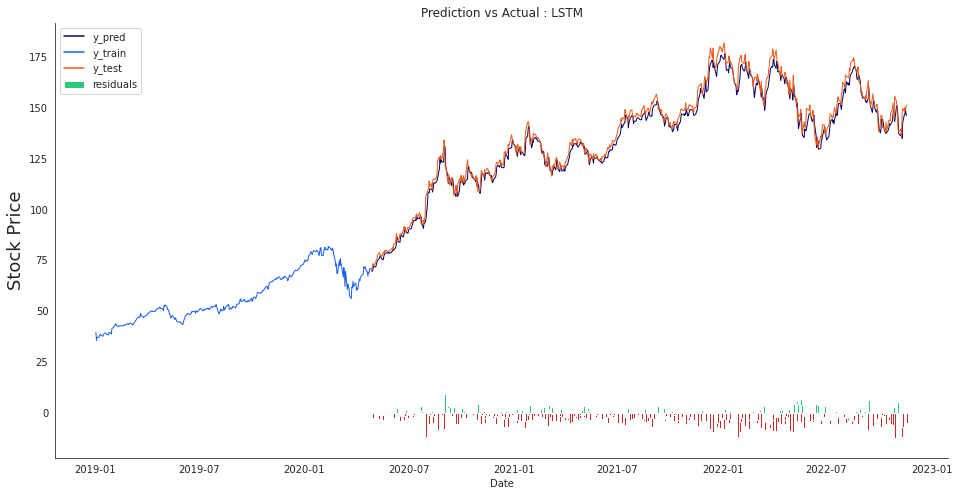

1/1 [==============================] - 0s 19ms/step
Sequence length  18
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
645/645 [==============================] - 9s 10ms/step - loss: 1.9620e-04 - val_loss: 8.6443e-04
Epoch 2/10
645/645 [==============================] - 5s 8ms/step - loss: 9.1576e-05 - val_loss: 0.0035
Epoch 3/10
645/645 [==============================] - 5s 8ms/step - loss: 6.6264e-05 - val_loss: 7.5055e-04
Epoch 4/10
645/645 [==============================] - 5s 8ms/step - loss: 6.8147e-05 - val_loss: 6.7389e-04
Epoch 5/10
645/645 [==============================] - 5s 8ms/step - loss: 5.1463e-05 - val_loss: 3.8517e-04
Epoch 6/10
645/645 [==============================] - 5s 8ms/step - loss: 4.6527e-05 - val_loss: 4.8680e-04
Epoch 7/10
645/645 [==============================] - 5s 8ms/step - loss: 4.0682e-05 - val_loss: 0.0012
Epoch 8/10
645/645 [==============================] - 6s 9ms/step - loss: 3.5212e-05 - val_loss: 3.4562e-04
Ep

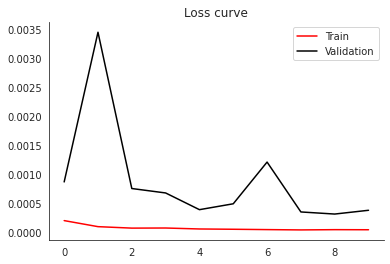

21/21 [==============================] - 1s 4ms/step


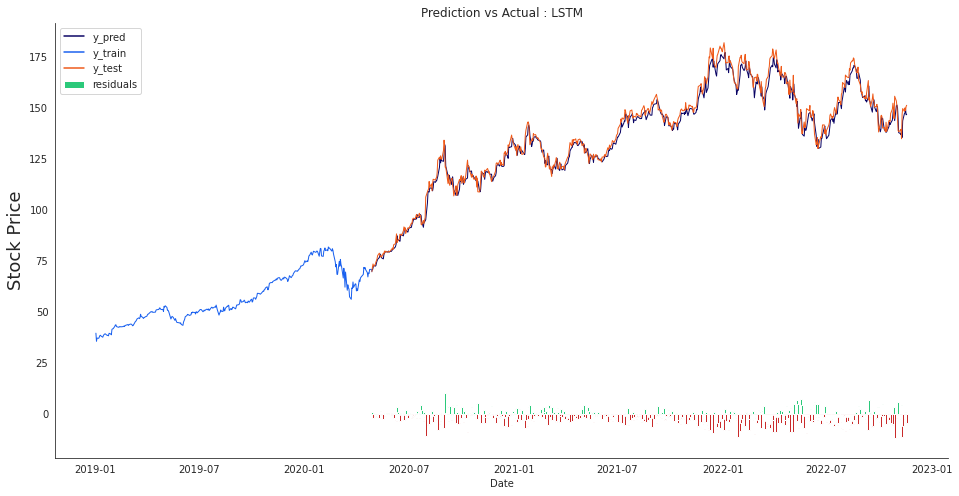

1/1 [==============================] - 0s 24ms/step
Sequence length  19
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
645/645 [==============================] - 9s 10ms/step - loss: 1.8557e-04 - val_loss: 0.0023
Epoch 2/10
645/645 [==============================] - 5s 8ms/step - loss: 7.5881e-05 - val_loss: 7.6702e-04
Epoch 3/10
645/645 [==============================] - 6s 9ms/step - loss: 5.8195e-05 - val_loss: 4.6607e-04
Epoch 4/10
645/645 [==============================] - 6s 9ms/step - loss: 7.4306e-05 - val_loss: 0.0011
Epoch 5/10
645/645 [==============================] - 6s 9ms/step - loss: 4.4479e-05 - val_loss: 3.6190e-04
Epoch 6/10
645/645 [==============================] - 6s 9ms/step - loss: 3.9556e-05 - val_loss: 3.5161e-04
Epoch 7/10
645/645 [==============================] - 6s 9ms/step - loss: 4.2086e-05 - val_loss: 0.0013
Epoch 8/10
645/645 [==============================] - 5s 8ms/step - loss: 3.9296e-05 - val_loss: 5.0371e-04
Epoch 

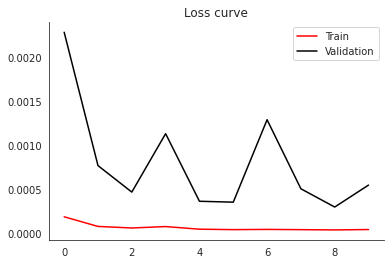

21/21 [==============================] - 1s 4ms/step


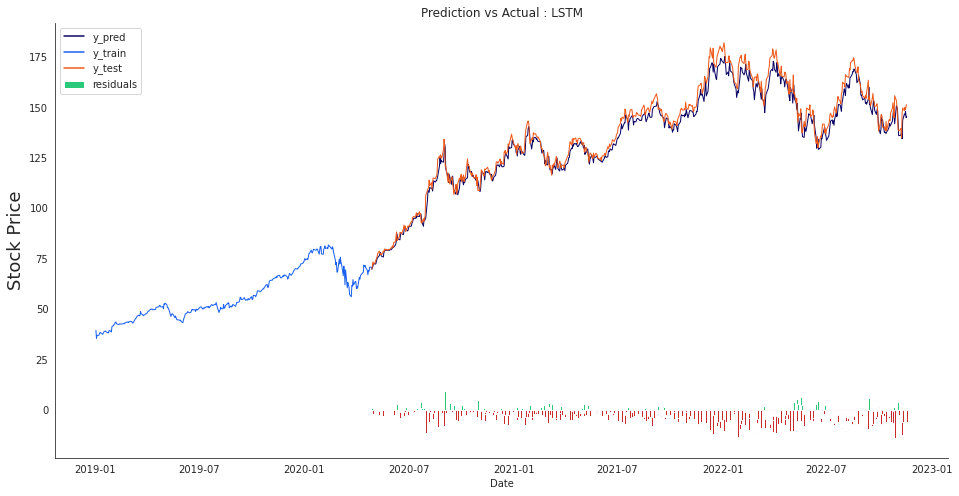

1/1 [==============================] - 0s 17ms/step


In [ ]:
# Sequence length Experiment
features_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
epochs = 10 
batch_size = 4
start_date = '2010-01-01'
symbol = "AAPL"
learning_rate = 0.001
experiment_results_seq_lstm = []
for sequence_length in range(1, 20):
    print('Sequence length ', sequence_length)
    experiment_result = run_experiment(LSTM_MODEL, features_columns, learning_rate, epochs, batch_size, start_date, symbol, sequence_length)
    experiment_results_seq_lstm.append(experiment_result)


In [ ]:
experiment_results_seq_lstm_df = pd.DataFrame(experiment_results_seq_lstm)
experiment_results_seq_lstm_df

NameError: ignored

In [ ]:
# TODO: Compare sequence length of 90 with LSTM and GRU